In [1]:
#import
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import nltk
from nltk.corpus import stopwords
import string
#You will have to download the set of stop words the first time
#nltk.download('stopwords')
#nltk.download('punkt')
from collections import Counter

In [2]:
#define
top_N = 10000
stopwords = nltk.corpus.stopwords.words('english')
#we need to rename this directory to wherever the CSV files are located
yelp_attr = pd.read_csv('yelp_business_attributes.csv')
yelp_rev = pd.read_csv('yelp_review.csv',nrows = 10000)
bougie_businesses = pd.read_csv('Bougie_Businesses.csv')
yelp_business_data = pd.read_csv('yelp_business.csv')

In [3]:
yelp_business_data.head()

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",NaN,"""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,85044,33.330690,-111.978599,4.0,22,1,Dentists;General Dentistry;Health & Medical;Or...
1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""",NaN,"""3101 Washington Rd""",McMurray,PA,15317,40.291685,-80.104900,3.0,11,1,Hair Stylists;Hair Salons;Men's Hair Salons;Bl...
2,KQPW8lFf1y5BT2MxiSZ3QA,"""Western Motor Vehicle""",NaN,"""6025 N 27th Ave, Ste 1""",Phoenix,AZ,85017,33.524903,-112.115310,1.5,18,1,Departments of Motor Vehicles;Public Services ...
3,8DShNS-LuFqpEWIp0HxijA,"""Sports Authority""",NaN,"""5000 Arizona Mills Cr, Ste 435""",Tempe,AZ,85282,33.383147,-111.964725,3.0,9,0,Sporting Goods;Shopping
4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",NaN,"""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.475690,3.5,116,1,American (New);Nightlife;Bars;Sandwiches;Ameri...


In [4]:
#Combine Ambience and Reviews into a Dataframe
yelp_reviewd = pd.merge(yelp_rev, yelp_attr, on='business_id')
i = 0
for index, row in yelp_reviewd.iterrows():    
    yelp_reviewd.loc[index, "is_bougie"] = row["stars"] == 5
yelp_reviewd.head(10)
#list(yelp_reviewd.columns.values)



,review_id,user_id,business_id,stars,date,text,useful,funny,cool,AcceptsInsurance,...,DietaryRestrictions_dairy-free,DietaryRestrictions_gluten-free,DietaryRestrictions_vegan,DietaryRestrictions_kosher,DietaryRestrictions_halal,DietaryRestrictions_soy-free,DietaryRestrictions_vegetarian,AgesAllowed,RestaurantsCounterService,is_bougie
0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,2016-05-28,Super simple place but amazing nonetheless. It...,0,0,0,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,True
1,vm1b1keOzwHjtGZEPPuYXA,xYciRtVZ1PW4IxSX4oJ1aw,AEx2SYEUJmTxVVB18LlCwA,5,2016-02-22,*The shop was featured on Mind of a Chef with ...,4,3,4,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,True
2,n6QzIUObkYshz4dz2QRJTw,bv2nCi5Qv5vroFiqKGopiw,VR6GpWIda3SfvPC-lg9H3w,5,2016-05-28,Small unassuming place that changes their menu...,0,0,0,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,True
3,MV3CcKScW05u5LVfF6ok0g,bv2nCi5Qv5vroFiqKGopiw,CKC0-MOWMqoeWf6s-szl8g,5,2016-05-28,Lester's is located in a beautiful neighborhoo...,0,0,0,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,True
4,IXvOzsEMYtiJI0CARmj77Q,bv2nCi5Qv5vroFiqKGopiw,ACFtxLv8pGrrxMm6EgjreA,4,2016-05-28,Love coming here. Yes the place always needs t...,0,0,0,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,False
5,i5kyjrSfzAC-RJLTYx6pTQ,pnASSACWj87icFTteMkbtA,ACFtxLv8pGrrxMm6EgjreA,5,2014-06-28,"Wow, just the most tasty burguer I've ever had...",0,0,0,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,True
6,L_9BTb55X0GDtThi6GlZ6w,bv2nCi5Qv5vroFiqKGopiw,s2I_Ni76bjJNK9yG60iD-Q,4,2016-05-28,Had their chocolate almond croissant and it wa...,0,0,0,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,False
7,HRPm3vEZ_F-33TYVT7Pebw,_4iMDXbXZ1p1ONG297YEAQ,8QWPlVQ6D-OExqXoaD2Z1g,5,2014-09-24,Cycle Pub Las Vegas was a blast! Got a groupon...,1,0,0,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,True
8,ymAUG8DZfQcFTBSOiaNN4w,u0LXt3Uea_GidxRW1xcsfg,9_CGhHMz8698M9-PkVf0CQ,4,2012-05-11,Who would have guess that you would be able to...,0,0,2,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,False
9,8UIishPUD92hXtScSga_gw,u0LXt3Uea_GidxRW1xcsfg,gkCorLgPyQLsptTHalL61g,4,2015-10-27,Always drove past this coffee house and wonder...,1,0,0,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,False


In [5]:
#With the New Bugie Businesses
bougie_biz = pd.merge( bougie_businesses, yelp_business_data, on='business_id', how='left')
bougie_biz.head(-10)

,business_id,Bougie_Rating,Unnamed: 2,Unnamed: 3,Unnamed: 4,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,El4FC8jcawUVgw_0EIcbaQ,133,NaN,,NaN,"""MGM Grand Hotel""",The Strip,"""3799 Las Vegas Blvd S""",Las Vegas,NV,89109,36.102251,-115.169968,3.0,3444,1,Restaurants;Arts & Entertainment;Hotels;Event ...
1,g8OnV26ywJlZpezdBnOWUQ,129,NaN,NaN,NaN,"""Hash House A Go Go""",Westside,"""6800 W Sahara Ave""",Las Vegas,NV,89146,36.144667,-115.239955,4.0,3050,1,Restaurants;Breakfast & Brunch;American (New)
2,JmI9nslLD7KZqRr__Bg6NQ,127,NaN,NaN,NaN,"""Phoenix Sky Harbor International Airport""",NaN,"""3400 E Sky Harbor Blvd, Ste 3300""",Phoenix,AZ,85034,33.435943,-112.011026,3.0,2215,1,Hotels & Travel;Airports
3,Wxxvi3LZbHNIDwJ-ZimtnA,126,NaN,NaN,NaN,"""The Venetian Las Vegas""",The Strip,"""3355 South Las Vegas Boulevard""",Las Vegas,NV,89109,36.121189,-115.169657,4.0,3101,1,Casinos;Hotels;Resorts;Arts & Entertainment;Ev...
4,XZbuPXdyA0ZtTu3AzqtQhg,120,NaN,NaN,NaN,"""Mesa Grill""",The Strip,"""3570 Las Vegas Blvd S""",Las Vegas,NV,89109,36.117125,-115.174793,4.0,3012,1,New Mexican Cuisine;Mexican;Restaurants;Southe...
5,q3dJQtwZQrrurNT-1bNKgQ,116,NaN,NaN,NaN,"""Capo's Italian Cuisine""",Westside,"""5675 W Sahara Ave""",Las Vegas,NV,89146,36.143974,-115.219248,4.0,1089,1,Restaurants;Italian
6,UBQRhqRMW4Sk7kSZvZ1iAQ,105,NaN,NaN,NaN,"""Essence Bakery Café""",NaN,"""825 W University Dr""",Tempe,AZ,85281,33.421657,-111.951170,4.0,439,0,Restaurants;Cafes;Bakeries;Food;Sandwiches
7,k1QpHAkzKTrFYfk6u--VgQ,103,NaN,NaN,NaN,"""The Parlor""",NaN,"""1916 E Camelback Rd""",Phoenix,AZ,85016,33.509446,-112.040395,4.0,1081,1,Sandwiches;Salad;Italian;Pizza;Restaurants
8,ALn_0f-Usn3n0a9WBcjhhg,102,NaN,NaN,NaN,"""Hanny's""",NaN,"""40 N 1st St""",Phoenix,AZ,85004,33.449228,-112.072853,3.5,709,1,Restaurants;Pizza;Cocktail Bars;Nightlife;Loun...
9,mPfdYJj4d5KBPINDkaZY-Q,102,NaN,NaN,,"""Churn""",NaN,"""5223 N Central Ave""",Phoenix,AZ,85012,33.513504,-112.073389,4.5,728,1,Food;Ice Cream & Frozen Yogurt;Desserts;Coffee...


In [6]:
middle = bougie_biz.loc[bougie_biz["Bougie_Rating"] > 10]

super_bugie = bougie_biz.loc[bougie_biz["Bougie_Rating"] >= 50]
not_bad_bugie = middle.loc[middle["Bougie_Rating"] < 50]
not_good_bugie = bougie_biz.loc[bougie_biz["Bougie_Rating"] < 10]

super_bugie.head()

,business_id,Bougie_Rating,Unnamed: 2,Unnamed: 3,Unnamed: 4,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,El4FC8jcawUVgw_0EIcbaQ,133,NaN,,NaN,"""MGM Grand Hotel""",The Strip,"""3799 Las Vegas Blvd S""",Las Vegas,NV,89109,36.102251,-115.169968,3.0,3444,1,Restaurants;Arts & Entertainment;Hotels;Event ...
1,g8OnV26ywJlZpezdBnOWUQ,129,NaN,NaN,NaN,"""Hash House A Go Go""",Westside,"""6800 W Sahara Ave""",Las Vegas,NV,89146,36.144667,-115.239955,4.0,3050,1,Restaurants;Breakfast & Brunch;American (New)
2,JmI9nslLD7KZqRr__Bg6NQ,127,NaN,NaN,NaN,"""Phoenix Sky Harbor International Airport""",NaN,"""3400 E Sky Harbor Blvd, Ste 3300""",Phoenix,AZ,85034,33.435943,-112.011026,3.0,2215,1,Hotels & Travel;Airports
3,Wxxvi3LZbHNIDwJ-ZimtnA,126,NaN,NaN,NaN,"""The Venetian Las Vegas""",The Strip,"""3355 South Las Vegas Boulevard""",Las Vegas,NV,89109,36.121189,-115.169657,4.0,3101,1,Casinos;Hotels;Resorts;Arts & Entertainment;Ev...
4,XZbuPXdyA0ZtTu3AzqtQhg,120,NaN,NaN,NaN,"""Mesa Grill""",The Strip,"""3570 Las Vegas Blvd S""",Las Vegas,NV,89109,36.117125,-115.174793,4.0,3012,1,New Mexican Cuisine;Mexican;Restaurants;Southe...


In [7]:
# Groupby_city
super_by_city = super_bugie.groupby(["city"])
not_bad_by_city = not_bad_bugie.groupby(["city"])
not_good_by_city = not_good_bugie.groupby(["city"])
super_by_city.head()

,business_id,Bougie_Rating,Unnamed: 2,Unnamed: 3,Unnamed: 4,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,El4FC8jcawUVgw_0EIcbaQ,133,NaN,,NaN,"""MGM Grand Hotel""",The Strip,"""3799 Las Vegas Blvd S""",Las Vegas,NV,89109,36.102251,-115.169968,3.0,3444,1,Restaurants;Arts & Entertainment;Hotels;Event ...
1,g8OnV26ywJlZpezdBnOWUQ,129,NaN,NaN,NaN,"""Hash House A Go Go""",Westside,"""6800 W Sahara Ave""",Las Vegas,NV,89146,36.144667,-115.239955,4.0,3050,1,Restaurants;Breakfast & Brunch;American (New)
2,JmI9nslLD7KZqRr__Bg6NQ,127,NaN,NaN,NaN,"""Phoenix Sky Harbor International Airport""",NaN,"""3400 E Sky Harbor Blvd, Ste 3300""",Phoenix,AZ,85034,33.435943,-112.011026,3.0,2215,1,Hotels & Travel;Airports
3,Wxxvi3LZbHNIDwJ-ZimtnA,126,NaN,NaN,NaN,"""The Venetian Las Vegas""",The Strip,"""3355 South Las Vegas Boulevard""",Las Vegas,NV,89109,36.121189,-115.169657,4.0,3101,1,Casinos;Hotels;Resorts;Arts & Entertainment;Ev...
4,XZbuPXdyA0ZtTu3AzqtQhg,120,NaN,NaN,NaN,"""Mesa Grill""",The Strip,"""3570 Las Vegas Blvd S""",Las Vegas,NV,89109,36.117125,-115.174793,4.0,3012,1,New Mexican Cuisine;Mexican;Restaurants;Southe...
5,q3dJQtwZQrrurNT-1bNKgQ,116,NaN,NaN,NaN,"""Capo's Italian Cuisine""",Westside,"""5675 W Sahara Ave""",Las Vegas,NV,89146,36.143974,-115.219248,4.0,1089,1,Restaurants;Italian
6,UBQRhqRMW4Sk7kSZvZ1iAQ,105,NaN,NaN,NaN,"""Essence Bakery Café""",NaN,"""825 W University Dr""",Tempe,AZ,85281,33.421657,-111.951170,4.0,439,0,Restaurants;Cafes;Bakeries;Food;Sandwiches
7,k1QpHAkzKTrFYfk6u--VgQ,103,NaN,NaN,NaN,"""The Parlor""",NaN,"""1916 E Camelback Rd""",Phoenix,AZ,85016,33.509446,-112.040395,4.0,1081,1,Sandwiches;Salad;Italian;Pizza;Restaurants
8,ALn_0f-Usn3n0a9WBcjhhg,102,NaN,NaN,NaN,"""Hanny's""",NaN,"""40 N 1st St""",Phoenix,AZ,85004,33.449228,-112.072853,3.5,709,1,Restaurants;Pizza;Cocktail Bars;Nightlife;Loun...
9,mPfdYJj4d5KBPINDkaZY-Q,102,NaN,NaN,,"""Churn""",NaN,"""5223 N Central Ave""",Phoenix,AZ,85012,33.513504,-112.073389,4.5,728,1,Food;Ice Cream & Frozen Yogurt;Desserts;Coffee...


In [8]:
super_city = super_by_city.city.count()
not_bad_city = not_bad_by_city.city.count()
not_good_city = not_good_by_city.city.count()

super_by_city.head()                      

,business_id,Bougie_Rating,Unnamed: 2,Unnamed: 3,Unnamed: 4,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,El4FC8jcawUVgw_0EIcbaQ,133,NaN,,NaN,"""MGM Grand Hotel""",The Strip,"""3799 Las Vegas Blvd S""",Las Vegas,NV,89109,36.102251,-115.169968,3.0,3444,1,Restaurants;Arts & Entertainment;Hotels;Event ...
1,g8OnV26ywJlZpezdBnOWUQ,129,NaN,NaN,NaN,"""Hash House A Go Go""",Westside,"""6800 W Sahara Ave""",Las Vegas,NV,89146,36.144667,-115.239955,4.0,3050,1,Restaurants;Breakfast & Brunch;American (New)
2,JmI9nslLD7KZqRr__Bg6NQ,127,NaN,NaN,NaN,"""Phoenix Sky Harbor International Airport""",NaN,"""3400 E Sky Harbor Blvd, Ste 3300""",Phoenix,AZ,85034,33.435943,-112.011026,3.0,2215,1,Hotels & Travel;Airports
3,Wxxvi3LZbHNIDwJ-ZimtnA,126,NaN,NaN,NaN,"""The Venetian Las Vegas""",The Strip,"""3355 South Las Vegas Boulevard""",Las Vegas,NV,89109,36.121189,-115.169657,4.0,3101,1,Casinos;Hotels;Resorts;Arts & Entertainment;Ev...
4,XZbuPXdyA0ZtTu3AzqtQhg,120,NaN,NaN,NaN,"""Mesa Grill""",The Strip,"""3570 Las Vegas Blvd S""",Las Vegas,NV,89109,36.117125,-115.174793,4.0,3012,1,New Mexican Cuisine;Mexican;Restaurants;Southe...
5,q3dJQtwZQrrurNT-1bNKgQ,116,NaN,NaN,NaN,"""Capo's Italian Cuisine""",Westside,"""5675 W Sahara Ave""",Las Vegas,NV,89146,36.143974,-115.219248,4.0,1089,1,Restaurants;Italian
6,UBQRhqRMW4Sk7kSZvZ1iAQ,105,NaN,NaN,NaN,"""Essence Bakery Café""",NaN,"""825 W University Dr""",Tempe,AZ,85281,33.421657,-111.951170,4.0,439,0,Restaurants;Cafes;Bakeries;Food;Sandwiches
7,k1QpHAkzKTrFYfk6u--VgQ,103,NaN,NaN,NaN,"""The Parlor""",NaN,"""1916 E Camelback Rd""",Phoenix,AZ,85016,33.509446,-112.040395,4.0,1081,1,Sandwiches;Salad;Italian;Pizza;Restaurants
8,ALn_0f-Usn3n0a9WBcjhhg,102,NaN,NaN,NaN,"""Hanny's""",NaN,"""40 N 1st St""",Phoenix,AZ,85004,33.449228,-112.072853,3.5,709,1,Restaurants;Pizza;Cocktail Bars;Nightlife;Loun...
9,mPfdYJj4d5KBPINDkaZY-Q,102,NaN,NaN,,"""Churn""",NaN,"""5223 N Central Ave""",Phoenix,AZ,85012,33.513504,-112.073389,4.5,728,1,Food;Ice Cream & Frozen Yogurt;Desserts;Coffee...


In [9]:
#Bougie raitings PER city
super_words_per_city = super_by_city.Bougie_Rating.sum()
not_bad_words_per_city = not_bad_by_city.Bougie_Rating.sum()
not_good_words_per_city = not_good_by_city.Bougie_Rating.sum()

super_words_per_city.head()

city
Chandler       62
Gilbert        55
Las Vegas    2425
Markham        51
Mesa          110
Name: Bougie_Rating, dtype: int64

In [10]:
#Mean-words
super_words_mean = super_words_per_city / super_city
not_bad_words_mean = not_bad_words_per_city / not_bad_city
not_good_words_mean = not_good_words_per_city / not_good_city

super_words_mean.head()

city
Chandler     62.000000
Gilbert      55.000000
Las Vegas    78.225806
Markham      51.000000
Mesa         55.000000
dtype: float64

In [11]:
#Bougie raitings PER city
super_reviews_per_city = super_by_city.review_count.sum()
not_bad_reviews_per_city = not_bad_by_city.review_count.sum()
not_good_reviews_per_city = not_good_by_city.review_count.sum()

super_reviews_per_city.head()

city
Chandler        34
Gilbert        328
Las Vegas    65270
Markham         15
Mesa          1238
Name: review_count, dtype: int64

In [12]:
super_reviews_mean = super_reviews_per_city / super_city
not_bad_reviews_mean = not_bad_reviews_per_city / not_bad_city
not_good_reviews_mean = not_good_reviews_per_city / not_good_city

super_reviews_mean.head()

city
Chandler       34.000000
Gilbert       328.000000
Las Vegas    2105.483871
Markham        15.000000
Mesa          619.000000
dtype: float64

In [13]:
bougie_biz = bougie_biz.set_index(["city"])
bougie_biz_index = bougie_biz.sort_index()

bougie_biz_index.head()

,business_id,Bougie_Rating,Unnamed: 2,Unnamed: 3,Unnamed: 4,name,neighborhood,address,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
city,,,,,,,,,,,,,,,,
Ahwatukee,0Rni7ocMC_Lg2UH0lDeKMQ,13,NaN,NaN,NaN,"""Barro's Pizza""",NaN,"""4625 E Ray Rd""",AZ,85044,33.318059,-111.983528,3.5,74,1,Restaurants;Pizza;Italian;Sandwiches
Boucherville,9XF1lIPA7EVw8n30gvSwUQ,10,NaN,NaN,NaN,"""Sushi Hamachi""",NaN,"""690 Rue de Montbrun""",QC,J4B 8H2,45.611019,-73.439350,4.5,8,1,Restaurants;Sushi Bars;Japanese
Boulder City,87bozyZ6vtlEDy33Ek_fZw,13,NaN,NaN,NaN,"""Grandma Daisy's""",NaN,"""530 Nevada Way""",NV,89005,35.977549,-114.838189,4.0,72,1,Bakeries;Food;Candy Stores;Specialty Food;Ice ...
Boulder City,Vay9xHwcvu7VRZOddBgn-A,20,NaN,NaN,NaN,"""The Coffee Cup""",NaN,"""512 Nevada Hwy""",NV,89005,35.977708,-114.838063,4.5,509,1,Restaurants;Diners;Breakfast & Brunch;Food;Cof...
Boulder City,SHj_WEN8p2U3LsglfdUY7A,8,NaN,NaN,NaN,"""Railroad Tunnel Trail""",NaN,"""Lakeshore Rd""",NV,89005,36.011269,-114.794844,4.5,72,1,Active Life;Hiking


In [14]:
#Bobbles 1
df_city_middle = bougie_biz_index.loc[bougie_biz_index["Bougie_Rating"] > 10]

df_city_super = bougie_biz_index.loc[bougie_biz_index["Bougie_Rating"] >= 50]
df_city_not_bad = df_city_middle.loc[df_city_middle["Bougie_Rating"] < 50]
df_city_not_good = bougie_biz_index.loc[bougie_biz_index["Bougie_Rating"] < 10]

df_city_super.head()

,business_id,Bougie_Rating,Unnamed: 2,Unnamed: 3,Unnamed: 4,name,neighborhood,address,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
city,,,,,,,,,,,,,,,,
Chandler,Dh1THmsiHfz_1J37Q3sdgg,62,NaN,NaN,NaN,"""All-American Eyeglass Repair""",NaN,"""4940 W Ray Rd""",AZ,85226,33.320043,-111.926617,4.5,34,1,Shopping;Eyewear & Opticians
Gilbert,vrKcFQPxj1Zzyj93yl-t6g,55,NaN,NaN,NaN,"""Topgolf""",NaN,"""1689 S Santan Village Pkwy""",AZ,85295,33.320190,-111.741575,4.0,328,1,Golf;Restaurants;Bars;Nightlife;American (New)...
Las Vegas,El4FC8jcawUVgw_0EIcbaQ,133,NaN,,NaN,"""MGM Grand Hotel""",The Strip,"""3799 Las Vegas Blvd S""",NV,89109,36.102251,-115.169968,3.0,3444,1,Restaurants;Arts & Entertainment;Hotels;Event ...
Las Vegas,5CJL_2-XwCGBmOav4mFdYg,53,NaN,NaN,NaN,"""Krung Siam Thai""",Chinatown,"""3755 Spring Mountain Rd, Ste 102""",NV,89102,36.126156,-115.189640,3.5,486,1,Restaurants;Thai
Las Vegas,6Q7-wkCPc1KF75jZLOTcMw,52,NaN,NaN,NaN,"""Circus Circus Las Vegas Hotel and Casino""",The Strip,"""2880 S Las Vegas Blvd""",NV,89109,36.136304,-115.162227,2.5,2171,1,Arts & Entertainment;Event Planning & Services...


In [15]:
#bubbles
super_bubbles = df_city_super["review_count"] * 5
not_bad_bubbles = df_city_not_bad["review_count"] * 5
not_good_bubbles = df_city_not_good["review_count"] * 5

Text(22, 40, 'Note:\nNumber of reviews per city by category.')

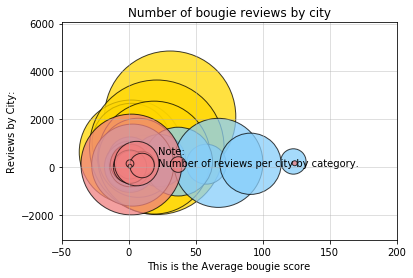

In [16]:
#Graph
super_graph = plt.scatter(super_city, super_reviews_mean, marker="o", c='gold', edgecolors="black", s=super_bubbles, alpha=0.75, label="super bugie by review")
not_bad_graph = plt.scatter(not_bad_city, not_bad_reviews_mean, marker="o", c='lightskyblue', edgecolors="black", s=not_bad_bubbles, alpha=0.75, label="Not Bad Bugie By review")
not_good_graph = plt.scatter(not_good_city, not_good_reviews_mean, marker="o", c='lightcoral', edgecolors="black", s=not_good_bubbles, alpha=0.75, label="Not Good Bugie By review")

plt.ylim(-3050, 6050)
plt.xlim(-50, 200)
plt.grid(axis='both', alpha=0.5)
plt.xlabel("This is the Average bougie score")
plt.ylabel("Reviews by City:")
plt.title("Number of bougie reviews by city")
plt.text(x=22, y=40, s='Note:\nNumber of reviews per city by category.')

Text(60, 170, 'Note:\nNumber of bougie words per city.')

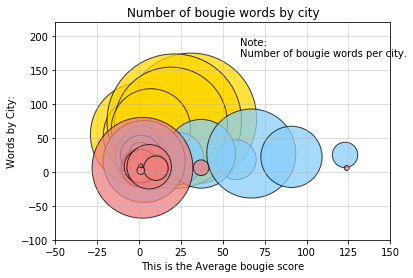

In [17]:
super_graph = plt.scatter(super_city, super_words_mean, marker="o", c='gold', edgecolors="black", s=super_bubbles, alpha=0.75, label="super bugie by review")
not_bad_graph = plt.scatter(not_bad_city, not_bad_words_mean, marker="o", c='lightskyblue', edgecolors="black", s=not_bad_bubbles, alpha=0.75, label="Not Bad Bugie By review")
not_good_graph = plt.scatter(not_good_city, not_good_words_mean, marker="o", c='lightcoral', edgecolors="black", s=not_good_bubbles, alpha=0.75, label="Not Good Bugie By review")

plt.ylim(-100, 220)
plt.xlim(-50, 150)
plt.grid(axis='both', alpha=0.5)
plt.xlabel("This is the Average bougie score")
plt.ylabel("Words by City:")
plt.title("Number of bougie words by city")
plt.text(x=60, y=170, s='Note:\nNumber of bougie words per city.')

In [18]:
#Filter all restaurants by is_bougie true
is_bougie = yelp_reviewd[yelp_reviewd["is_bougie"] == True]
text_data_seriesb = is_bougie["text"]
text_data_seriesb.head(10)


0     Super simple place but amazing nonetheless. It...
1     *The shop was featured on Mind of a Chef with ...
2     Small unassuming place that changes their menu...
3     Lester's is located in a beautiful neighborhoo...
5     Wow, just the most tasty burguer I've ever had...
7     Cycle Pub Las Vegas was a blast! Got a groupon...
16    its delicious. its loud. its funny. seems like...
17    Love this place! If I ever have international ...
19    This place is awesome! Definitely authentic!!!...
28    Best burger place I've had in Toronto. Hands d...
Name: text, dtype: object

In [19]:
RE_stopwords = r'\b(?:{})\b'.format('|'.join(stopwords))
# replace '|'-->' ' and drop all stopwords
wordsb = (text_data_seriesb
           .str.lower()
           .replace([r'\(','\)','\|','\,','\.','\?','\!','\_','\-','\:','\"','\*',"\'", RE_stopwords], ['','','','','','','',' ','','','','','', ''], regex=True)
           .str.cat(sep=' ')
           .split()
)

# generate DF out of Counter
rsltb = pd.DataFrame(Counter(wordsb).most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')
print(rsltb)

# plot
#rslt.plot.bar(rot=0, figsize=(16,10), width=0.8)

            Frequency
Word                 
great            1834
place            1758
food             1462
good             1333
one              1135
time             1120
like             1088
get              1028
service           987
love              960
back              928
go                901
also              890
really            866
always            798
well              784
best              783
ive               726
would             707
delicious         692
nice              692
friendly          683
im                654
us                632
amazing           626
staff             618
dont              608
even              576
first             542
try               542
...               ...
courted             1
destined            1
flings              1
sensuality          1
begs                1
towners             1
suspicious          1
bendie              1
minded              1
gratuity            1
10pm12am            1
joked               1
stalks    

In [20]:
#Repeat steps 5-8 with non-matching restaurants
#Filter all restaurants by is_bougie true
is_not_bougie = yelp_reviewd[yelp_reviewd["is_bougie"] == False]
text_data_seriesp = is_not_bougie["text"]
text_data_seriesp.head(10)

4     Love coming here. Yes the place always needs t...
6     Had their chocolate almond croissant and it wa...
8     Who would have guess that you would be able to...
9     Always drove past this coffee house and wonder...
10    Not bad!! Love that there is a gluten-free, ve...
11    I'm not on the Poutini's train. It's fine but ...
12    This is currently my parents new favourite res...
13    Server was a little rude.\n\nOrdered the calam...
14    I thought Tidy's Flowers had a great reputatio...
15    Wanted to check out this place due to all the ...
Name: text, dtype: object

In [21]:
RE_stopwords = r'\b(?:{})\b'.format('|'.join(stopwords))
# replace '|'-->' ' and drop all stopwords
wordsp = (text_data_seriesp
           .str.lower()
           .replace([r'\(','\)','\|','\,','\.','\?','\!','\_','\-','\:','\"','\*',"\'", RE_stopwords], ['','','','','','','',' ','','','','','', ''], regex=True)
           .str.cat(sep=' ')
           .split()
)

# generate DF out of Counter
rsltp = pd.DataFrame(Counter(wordsp).most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')
print(rsltp)

# plot
#rslt.plot.bar(rot=0, figsize=(16,10), width=0.8)

             Frequency
Word                  
good              4275
food              3808
place             3637
like              3261
one               2709
get               2505
great             2413
time              2365
would             2360
really            2282
service           2200
back              2031
go                1887
also              1883
dont              1661
im                1606
nice              1598
ordered           1508
little            1480
didnt             1455
well              1434
us                1375
got               1324
even              1316
order             1298
pretty            1293
came              1262
try               1225
menu              1220
ive               1205
...                ...
screamed             3
coquito              3
place;               3
billiards            3
cappuccinos          3
jeez                 3
davids               3
soirées              3
jouer                3
restuarant           3
130        

In [22]:
odd_word = list({s for s in wordsb if s not in wordsp})
print(odd_word)


['1$', 'shel', 'bennys', 'eggspectations', '247', 'quaility', 'muchas', 'torches', 'olivos', 'perusal', 'dropouts', 'pigged', 'sushiconveyor', 'wikisticks', 'minibridal', 'whoopie', 'ch', '\\/roll', 'chicfila', 'ducknot', 'fluffs', 'imadake', 'dreamland', '2hrs', 'porchette', 'nellie', 'immortalized', 'ricardo', 'openings', 'desertsespecially', 'fifths', 'monstrosities', 'sonando', 'aricini', 'sublime', 'reclined', 'konditormeister', 'atom', 'want~', 'tanned', 'floaties', 'momentum', 'nivatvongstobin', 'cevaps', 'seatingive', 'atmoshere', 'painstaking', 'levy', '120am', 'triangle', 'photos\\/xnjeadlrlj9azb8qsdir2qselect=tslblrhnktmrfw0sn7k6ea', 'compenchano', '1\\/23\\/2017', 'blanking', 'wilford', 'orthodontics', 'vélos', 'octupus', 'purslane', 'shiner', 'giner', 'steven', 'peaberryeast', 'barscoconut', 'rockabilly\\/punk\\/ska', 'tawook', 'beckers', 'frogger', 'flavorings', 'courvoisier', 'tuning', 'massacre', 'bachelorette\\/birthday', 'windshields', 'skywater', 'misconception', 'um

In [23]:
odd_wordres = pd.DataFrame(Counter(odd_word).most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')
print(odd_wordres)


                   Frequency
Word                        
1$                         1
shel                       1
bennys                     1
eggspectations             1
247                        1
quaility                   1
muchas                     1
torches                    1
olivos                     1
perusal                    1
dropouts                   1
pigged                     1
sushiconveyor              1
wikisticks                 1
minibridal                 1
whoopie                    1
ch                         1
\/roll                     1
chicfila                   1
ducknot                    1
fluffs                     1
imadake                    1
dreamland                  1
2hrs                       1
porchette                  1
nellie                     1
immortalized               1
ricardo                    1
openings                   1
desertsespecially          1
...                      ...
275                        1
empowering    

In [ ]:

# initilize by 0
# dictionary - business_id + counter
# increase counter for coorisponding business_id if you find a bougie word
# sort dictionary by values
# match review ID and resturant
business_id_to_counter = {}
for index, row in yelp_reviewd.iterrows():
    for word, word_row in odd_wordres.iterrows():
        if word in row["text"]:
            business_id = row["business_id"]
            # is the business in the dictionary already?
            if business_id in business_id_to_counter:
                business_id_to_counter[business_id] += 1
            else:
                # add the business
                business_id_to_counter[business_id] = 1

print(f"business_id_to_counter={business_id_to_counter}")
#sort the dictionary by values
sorted_biz = sorted(business_id_to_counter.items(), key=lambda kv: kv[1])
print(f"sorted_biz={sorted_biz}")

In [ ]:
#With the New Bugie Businesses
bougie_biz = pd.merge(bougie_businesses, yelp_business_data, on='business_id', how='left')

In [ ]:
print(bugie_biz)

Final Project for Word Monsters

1. create pyspark dataframe
2. use ML Big Data method to analyse deata
3. compare the two methods

In [26]:
from pyspark.context import SparkContext
from pyspark.sql.session import SparkSession
try:
    sc
    spark
except NameError:
    sc = SparkContext('local')
    spark = SparkSession(sc)

from pyspark import SparkFiles
# url ="https://s3.amazonaws.com/dataviz-curriculum/day_2/yelp_reviews.csv"
# spark.sparkContext.addFile(url)
stars = spark.read.csv("yelp_review.csv", sep=",", header=True)

# Show DataFrame
stars.show()

+--------------------+--------------------+--------------------+-----+----------+--------------------+------+-----+----+
|           review_id|             user_id|         business_id|stars|      date|                text|useful|funny|cool|
+--------------------+--------------------+--------------------+-----+----------+--------------------+------+-----+----+
|vkVSCC7xljjrAI4UG...|bv2nCi5Qv5vroFiqK...|AEx2SYEUJmTxVVB18...|    5|2016-05-28|Super simple plac...|  null| null|null|
|Staff was very he...|                   0|                   0|    0|      null|                null|  null| null|null|
|n6QzIUObkYshz4dz2...|bv2nCi5Qv5vroFiqK...|VR6GpWIda3SfvPC-l...|    5|2016-05-28|Small unassuming ...|  null| null|null|
|We had their beef...|                null|                null| null|      null|                null|  null| null|null|
|A bit outside of ...|                   0|                   0|    0|      null|                null|  null| null|null|
|MV3CcKScW05u5LVfF...|bv2nCi5Qv5

In [30]:
# from pyspark.context import SparkContext
# from pyspark.sql.session import SparkSession

# from pyspark.sql.functions import loc
# # Create a length column to be used as a future feature 
# # five_stars = stars.withColumn('sentiment', loc(stars['stars'==5]))
# # five_stars.show()

# five_stars = pd.merge(yelp_rev, yelp_attr, on='business_id')
# i = 0
# for index, row in yelp_reviewd.iterrows():    
#     yelp_reviewd.loc[index, "is_bougie"] = row["stars"] == 5
# yelp_reviewd.head(10)

# sc = spark.sparkContext
# rdd = sc.parallelize(items)
# df = rdd.toDF(["id", "col1"])

import pyspark.sql.functions as func
# means = df.groupby("id").agg(func.mean("col1"))


five_stars = stars.withColumn(
    'class', stars.when((stars.col("stars") == '5'), 'positive')
    .otherwise("negative")
)
stars.show()

AttributeError: 'DataFrame' object has no attribute 'when'

In [ ]:
from pyspark.ml.feature import Tokenizer, StopWordsRemover, HashingTF, IDF, StringIndexer
# Create all the features to the data set
pos_neg_to_num = StringIndexer(inputCol='class',outputCol='label')
tokenizer = Tokenizer(inputCol="text", outputCol="token_text")
stopremove = StopWordsRemover(inputCol='token_text',outputCol='stop_tokens')
hashingTF = HashingTF(inputCol="token_text", outputCol='hash_token')
idf = IDF(inputCol='hash_token', outputCol='idf_token')


In [ ]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.linalg import Vector

# Create feature vectors
clean_up = VectorAssembler(inputCols=['idf_token', 'length'], outputCol='features')

In [ ]:
from pyspark.ml import Pipeline
data_prep_pipeline = Pipeline(stages=[pos_neg_to_num, tokenizer, stopremove, hashingTF, idf, clean_up])

In [ ]:
cleaner = data_prep_pipeline.fit(data_df)
cleaned = cleaner.transform(data_df)

In [ ]:
cleaned.select(['label', 'features']).show()

In [ ]:
from pyspark.ml.classification import NaiveBayes
# Break data down into a training set and a testing set
training, testing = cleaned.randomSplit([0.7, 0.3])

# Create a Naive Bayes model and fit training data
nb = NaiveBayes()
predictor = nb.fit(training)

In [ ]:
test_results = predictor.transform(testing)
# print(testing.columns)
# print(test_results.columns)
# test_results.toPandas().to_csv("test_results.csv")
test_results.show(5)

In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

acc_eval = MulticlassClassificationEvaluator()
acc = acc_eval.evaluate(test_results)
print("Accuracy of model at predicting reviews was: %f" % acc)